# Problem Statement

The Bank Indessa has not done well in the last 3 quarters. Their NPAs (Non Performing Assets) have reached all time high. It is starting to lose the confidence of its investors. As a result, it’s stock has fallen by 20% in the previous quarter alone.
After careful analysis, it was found that the majority of NPA was contributed by loan defaulters. With the messy data collected over all the years, this bank has decided to use machine learning to figure out a way to find these defaulters and devise a plan to reduce them.<br>
This bank uses a pool of investors to sanction their loans. For example: If any customer has applied for a loan of $20000, along with the bank, the investors perform due diligence on the requested loan application. Keep this in mind while understanding data. <br>
In this challenge, you will help this bank by predicting the probability that a member will default. <br>

# Data Understanding

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OrdinalEncoder
from tqdm import tqdm
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
import re
from bs4 import BeautifulSoup
import textfeatures as tf
from collections import Counter
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import operator
from wordcloud import WordCloud, STOPWORDS
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from scipy.sparse import coo_matrix, hstack
from sklearn.metrics import log_loss
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from yellowbrick.classifier import roc_auc
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report
import scipy
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from numba import njit
from scipy.stats import chisquare
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from scipy.sparse import coo_matrix, hstack, csr_matrix
import scipy
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from yellowbrick.classifier import roc_auc
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lette\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\lette\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
train = pd.read_csv('train_indessa.csv')
test = pd.read_csv('test_indessa.csv')

In [3]:
train['Type'] = "Train"
test['Type'] = "Test"
data = pd.concat([train,test],axis = 0)
data.shape

(887379, 46)

In [3]:
y_loan = train.pop('loan_status')

In [2]:
TRAIN_ROWS = 532428
TEST_ROWS = 354951
del train, test

In [5]:
print(train.shape)
print(test.shape)

(532428, 45)
(354951, 44)


In [7]:
print("Train Data Ratio",(train.shape[0]/(train.shape[0]+test.shape[0]))*100)
print("Test Data Ratio",(test.shape[0]/(train.shape[0]+test.shape[0]))*100)

Train Data Ratio 60.000067614852284
Test Data Ratio 39.99993238514772


In [3]:
train.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,...,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,58189336,14350,14350,14350.0,36 months,,19.19,E,E3,clerk,...,0.0,74.0,INDIVIDUAL,NaN,26th week,0.0,0.0,28699.0,30800.0,0
1,70011223,4800,4800,4800.0,36 months,BAT1586599,10.99,B,B4,Human Resources Specialist,...,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,0.0,9974.0,32900.0,0
2,70255675,10000,10000,10000.0,36 months,BAT1586599,7.26,A,A4,Driver,...,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,65.0,38295.0,34900.0,0
3,1893936,15000,15000,15000.0,36 months,BAT4808022,19.72,D,D5,Us office of Personnel Management,...,0.0,NaN,INDIVIDUAL,NaN,135th week,0.0,0.0,55564.0,24700.0,0
4,7652106,16000,16000,16000.0,36 months,BAT2833642,10.64,B,B2,LAUSD-HOLLYWOOD HIGH SCHOOL,...,0.0,NaN,INDIVIDUAL,NaN,96th week,0.0,0.0,47159.0,47033.0,0


In [4]:
test.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,...,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,11937648,14000,14000,14000.0,60 months,BAT4711174,16.24,C,C5,Data Analyst,...,0.0,0.0,NaN,INDIVIDUAL,NaN,104th week,0.0,0.0,85230.0,45700.0
1,38983318,16000,16000,16000.0,60 months,BAT4318899,9.49,B,B2,Senior Database Administrator,...,0.0,0.0,NaN,INDIVIDUAL,NaN,57th week,0.0,0.0,444991.0,21400.0
2,27999917,11050,11050,11050.0,60 months,BAT446479,15.61,D,D1,Customer service representative,...,0.0,0.0,26.0,INDIVIDUAL,NaN,70th week,0.0,0.0,105737.0,16300.0
3,61514932,35000,35000,34700.0,60 months,BAT4664105,12.69,C,C2,ACCT OFFICER,...,0.0,0.0,NaN,INDIVIDUAL,NaN,22th week,0.0,0.0,287022.0,72400.0
4,59622821,6500,6500,6500.0,36 months,,6.89,A,A3,Paralegal,...,0.0,0.0,NaN,INDIVIDUAL,NaN,22th week,0.0,0.0,234278.0,26700.0


In [12]:
(train.isna().sum()/train.shape[0])*100

member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
term                            0.000000
batch_enrolled                 15.992585
int_rate                        0.000000
grade                           0.000000
sub_grade                       0.000000
emp_title                       5.791018
emp_length                      5.050636
home_ownership                  0.000000
annual_inc                      0.000563
verification_status             0.000000
pymnt_plan                      0.000000
desc                           85.801085
purpose                         0.000000
title                           0.016904
zip_code                        0.000000
addr_state                      0.000000
dti                             0.000000
delinq_2yrs                     0.003005
inq_last_6mths                  0.003005
mths_since_last_delinq         51.190771
mths_since_last_

In [14]:
(test.isna().sum()/test.shape[0])*100

member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
term                            0.000000
batch_enrolled                 12.846562
int_rate                        0.000000
grade                           0.000000
sub_grade                       0.000000
emp_title                       5.811788
emp_length                      5.052528
home_ownership                  0.000000
annual_inc                      0.000282
verification_status             0.000000
pymnt_plan                      0.000000
desc                           85.862556
purpose                         0.000000
title                           0.017467
zip_code                        0.000000
addr_state                      0.000000
dti                             0.000000
delinq_2yrs                     0.003662
inq_last_6mths                  0.003662
mths_since_last_delinq         51.206505
mths_since_last_

In [17]:
data.shape

(887379, 46)

In [18]:
(data.isna().sum()/data.shape[0])*100

member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
term                            0.000000
batch_enrolled                 14.734178
int_rate                        0.000000
grade                           0.000000
sub_grade                       0.000000
emp_title                       5.799326
emp_length                      5.051393
home_ownership                  0.000000
annual_inc                      0.000451
verification_status             0.000000
pymnt_plan                      0.000000
desc                           85.825673
purpose                         0.000000
title                           0.017129
zip_code                        0.000000
addr_state                      0.000000
dti                             0.000000
delinq_2yrs                     0.003268
inq_last_6mths                  0.003268
mths_since_last_delinq         51.197065
mths_since_last_

# Data Cleaning

In [29]:
# The first stage of data cleaning I am removing any feature which have more than 80% of the data missing
# verification_status_joint, 
print("These Columns have less than 80% of data present, hence dropping these features",data.columns[data.isnull().mean() > 0.8])
data = data[list(data.columns[data.isnull().mean() < 0.8])]

These Columns have less than 80% of data present, hence dropping these features Index(['desc', 'mths_since_last_record', 'verification_status_joint'], dtype='object')


In [30]:
(data.isna().sum()/data.shape[0])*100

member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
term                            0.000000
batch_enrolled                 14.734178
int_rate                        0.000000
grade                           0.000000
sub_grade                       0.000000
emp_title                       5.799326
emp_length                      5.051393
home_ownership                  0.000000
annual_inc                      0.000451
verification_status             0.000000
pymnt_plan                      0.000000
purpose                         0.000000
title                           0.017129
zip_code                        0.000000
addr_state                      0.000000
dti                             0.000000
delinq_2yrs                     0.003268
inq_last_6mths                  0.003268
mths_since_last_delinq         51.197065
open_acc                        0.003268
pub_rec         

In [38]:
# "mths_since_last_major_derog" = months since most recent 90 day or worse rating
# Lets drop this feature as well
data = data[list(data.columns[data.isnull().mean() < 0.7])]

In [40]:
y_loan = data.pop("loan_status")
(data.isna().sum()/data.shape[0])*100

member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
batch_enrolled                14.734178
int_rate                       0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      5.799326
emp_length                     5.051393
home_ownership                 0.000000
annual_inc                     0.000451
verification_status            0.000000
pymnt_plan                     0.000000
purpose                        0.000000
title                          0.017129
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000
delinq_2yrs                    0.003268
inq_last_6mths                 0.003268
mths_since_last_delinq        51.197065
open_acc                       0.003268
pub_rec                        0.003268


In [42]:
# Now lets check out all thje features which have more some missing values
# We would try to fill the value one way of the other
data[list(data.columns[data.isnull().mean() > 0])].head()

,batch_enrolled,emp_title,emp_length,annual_inc,title,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_util,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,,clerk,9 years,28700.0,Debt consolidation,0.0,1.0,50.0,14.0,1.0,73.1,28.0,0.0,0.0,0.0,28699.0,30800.0
1,BAT1586599,Human Resources Specialist,< 1 year,65000.0,Home improvement,0.0,1.0,NaN,6.0,0.0,23.2,13.0,0.0,0.0,0.0,9974.0,32900.0
2,BAT1586599,Driver,2 years,45000.0,Debt consolidation,0.0,0.0,NaN,5.0,0.0,31.2,19.0,0.0,0.0,65.0,38295.0,34900.0
3,BAT4808022,Us office of Personnel Management,10+ years,105000.0,Debt consolidation,0.0,2.0,46.0,10.0,0.0,55.5,21.0,0.0,0.0,0.0,55564.0,24700.0
4,BAT2833642,LAUSD-HOLLYWOOD HIGH SCHOOL,10+ years,52000.0,refi,0.0,0.0,NaN,11.0,0.0,76.2,27.0,0.0,0.0,0.0,47159.0,47033.0


In [10]:
data = pd.read_pickle('save1.pkl')

In [44]:
# batch_enrolled:- batch numbers allotted to members || Here we can use some kind of clusturingn algorithm or KNN to impute data
# emp_title:- We can use NN here as well to impute missing values
# emp_length:- can also the calculated using a NN value
# annual_inc:- Replacing the nan value with median
# title:- This is  a text data, hence we can categorize the nan values as a new character. 
# delinq_2yrs:- Replacing the data with maximum count present i.e. 0
# inq_last_6mths:- Replacing this with 0
# mths_since_last_delinq:- Over 50% of the data is missing, hence would try to figure out using KNN
# open_acc - Replacing open account with most freq, i.e. mode of the feature
# pub_rec - Replacing the nan with the most freq, i.e. mode of the feature
# revol_util:- Replacing the data with mode
# total_acc:- Replace the nan with mode
# collections_12_mths_ex_med:- Replacing the missing data with mode i.e. 0
# acc_now_delinq:- Replacing the missing data with mode i.e. 0
# tot_coll_amt:- Replacing the nan value with mode i.e. 0
# tot_cur_bal:- Replacing it with median
# total_rev_hi_lim:- Replacing with median

208

In [11]:
data.emp_length.unique()

array(['9 years', '< 1 year', '2 years', '10+ years', '5 years',
       '8 years', '7 years', '4 years', nan, '1 year', '3 years',
       '6 years'], dtype=object)

In [12]:
# taking only the numeric value from it
data.emp_length = data.emp_length.str.extract('(^\d*)')

In [68]:
data['title'].isna().sum()

152

In [69]:
# Filling the missing values in "title" with a new text
mask = data.title.isnull() # we need to mask our inner filter
data.loc[mask, 'title'] = data.loc[mask, 'title'].fillna("This Field is Blank")

In [43]:
# Fill the missing calues with NaN
mask = data.annual_inc.isnull() # we need to mask our inner filter
data.loc[mask, 'annual_inc'] = data.loc[mask, 'annual_inc'].fillna(data.annual_inc.median())

C:\Users\lette\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


29


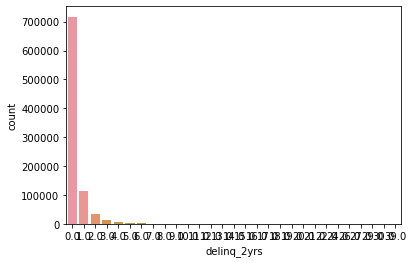

In [50]:
sns.countplot(data.delinq_2yrs)
print(data.delinq_2yrs.isna().sum())

In [52]:
mask = data.delinq_2yrs.isnull() # we need to mask our inner filter
data.loc[mask, 'delinq_2yrs'] = data.loc[mask, 'delinq_2yrs'].fillna(0)

In [57]:
data[data.inq_last_6mths.isnull()].shape

(29, 41)

C:\Users\lette\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='inq_last_6mths', ylabel='count'>

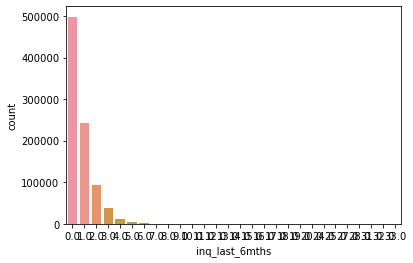

In [58]:
sns.countplot(data.inq_last_6mths)

In [59]:
mask = data.inq_last_6mths.isnull() # we need to mask our inner filter
data.loc[mask, 'inq_last_6mths'] = data.loc[mask, 'inq_last_6mths'].fillna(0)

In [60]:
data[data.mths_since_last_delinq.isnull()].shape

(454312, 41)

In [64]:
(data[data.mths_since_last_delinq.isnull()].shape[0]/data.shape[0])*100

51.19706461387975

C:\Users\lette\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='mths_since_last_delinq', ylabel='count'>

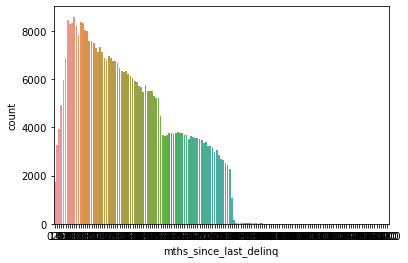

In [66]:
sns.countplot(data.mths_since_last_delinq)

(29, 41)


C:\Users\lette\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='open_acc', ylabel='count'>

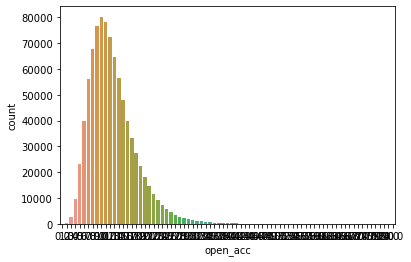

In [77]:
print(data[data.open_acc.isnull()].shape)
sns.countplot(data.open_acc)

In [82]:
mask = data.open_acc.isnull() # we need to mask our inner filter
data.loc[mask, 'open_acc'] = data.loc[mask, 'open_acc'].fillna(data.open_acc.mode()[0])

In [83]:
data[list(data.columns[data.isnull().mean() > 0])].columns

Index(['batch_enrolled', 'emp_title', 'emp_length', 'mths_since_last_delinq',
       'pub_rec', 'revol_util', 'total_acc', 'collections_12_mths_ex_med',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim'],
      dtype='object')

Number of Missing data 29


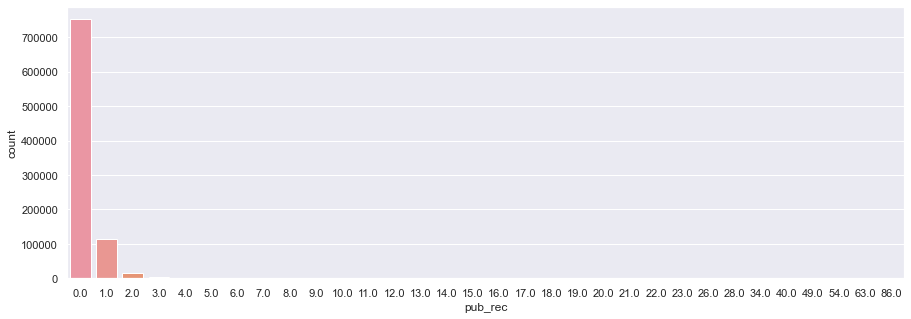

In [97]:
print("Number of Missing data",data.pub_rec.isna().sum())
sns.set(rc={'figure.figsize':(15,5)})
sns.countplot(data.pub_rec)
plt.show()

In [98]:
mask = data.pub_rec.isnull() # we need to mask our inner filter
data.loc[mask, 'pub_rec'] = data.loc[mask, 'pub_rec'].fillna(data.pub_rec.mode()[0])

Number of Missing data in amount of credit a member is using relative to revol_bal:  502


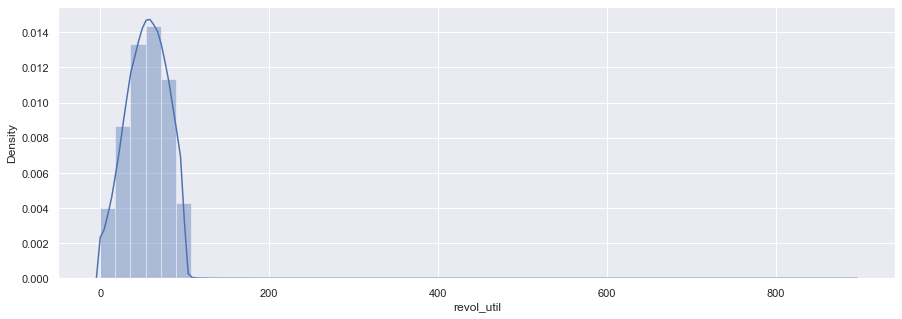

In [105]:
print("Number of Missing data in amount of credit a member is using relative to revol_bal: ",data.revol_util.isna().sum())
sns.set(rc={'figure.figsize':(15,5)})
sns.distplot(data.revol_util)
plt.show()

In [109]:
mask = data.revol_util.isnull() # we need to mask our inner filter
data.loc[mask, 'revol_util'] = data.loc[mask, 'revol_util'].fillna(data.revol_util.mode()[0])

In [116]:
mask = data.total_acc.isnull() # we need to mask our inner filter
data.loc[mask, 'total_acc'] = data.loc[mask, 'total_acc'].fillna(data.total_acc.mode()[0])

In [119]:
data.collections_12_mths_ex_med.mode()

0    0.0
dtype: float64

Number of Missing data for number of collections in last 12 months excluding medical collections:  145


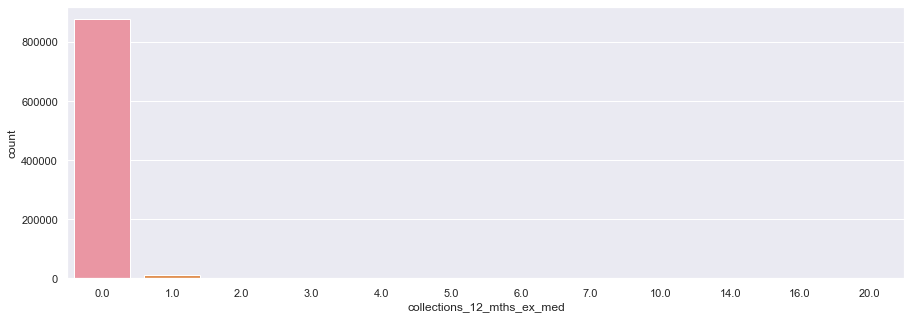

In [121]:
print("Number of Missing data for number of collections in last 12 months excluding medical collections: ",data.collections_12_mths_ex_med.isna().sum())
sns.set(rc={'figure.figsize':(15,5)})
sns.countplot(data.collections_12_mths_ex_med)
plt.show()

In [122]:
mask = data.collections_12_mths_ex_med.isnull() # we need to mask our inner filter
data.loc[mask, 'collections_12_mths_ex_med'] = data.loc[mask, 'collections_12_mths_ex_med'].fillna(data.collections_12_mths_ex_med.mode()[0])

In [124]:
data.acc_now_delinq.unique()

array([ 0.,  1.,  2.,  4.,  3.,  5., nan, 14.,  6.])

Number of Missing data for number of accounts on which the member is delinquent:  29


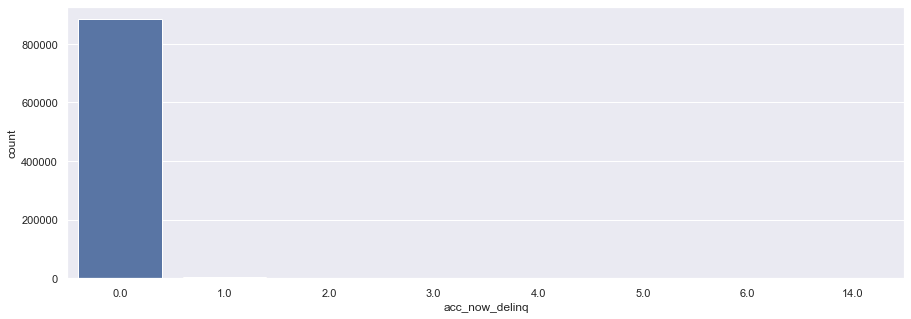

In [129]:
print("Number of Missing data for number of accounts on which the member is delinquent: ",data.acc_now_delinq.isna().sum())
sns.set(rc={'figure.figsize':(15,5)})
sns.countplot(data.acc_now_delinq)#(data[data.acc_now_delinq>3]['acc_now_delinq'])
plt.show()

In [133]:
mask = data.acc_now_delinq.isnull() # we need to mask our inner filter
data.loc[mask, 'acc_now_delinq'] = data.loc[mask, 'acc_now_delinq'].fillna(data.acc_now_delinq.mode()[0])

In [134]:
data.tot_coll_amt.isna().sum()

70276

In [ ]:
print("Number of Missing data for total collection amount ever owed: ",data.tot_coll_amt.isna().sum())
sns.set(rc={'figure.figsize':(15,5)})
sns.displot(data[data.tot_coll_amt>0]['tot_coll_amt'])
plt.show()

In [142]:
data.to_pickle('save2.pkl')

In [147]:
data[data.tot_coll_amt.isnull()][['tot_coll_amt','loan_amnt','int_rate','pymnt_plan']]

,tot_coll_amt,loan_amnt,int_rate,pymnt_plan
21,NaN,12400,6.62,n
47,NaN,20000,13.67,n
66,NaN,16000,6.03,n
67,NaN,35000,19.72,n
74,NaN,1000,12.12,n
...,...,...,...,...
354878,NaN,24000,10.99,n
354882,NaN,12000,9.76,n
354928,NaN,24000,11.36,n
354948,NaN,14000,17.51,n


Number of Missing data for total collection amount ever owed:  70276


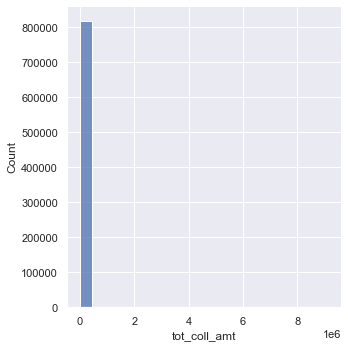

In [159]:
print("Number of Missing data for total collection amount ever owed: ",data.tot_coll_amt.isna().sum())
sns.set(rc={'figure.figsize':(15,5)})
sns.displot(data.tot_coll_amt)
plt.show()

In [160]:
mask = data.tot_coll_amt.isnull() # we need to mask our inner filter
data.loc[mask, 'tot_coll_amt'] = data.loc[mask, 'tot_coll_amt'].fillna(data.tot_coll_amt.mode()[0])

In [162]:
data.tot_cur_bal.isna().sum()

70276

Number of Missing data for total current balance of all accounts:  70276


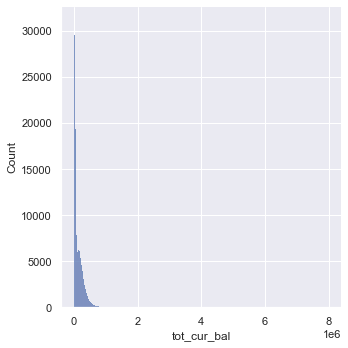

In [163]:
print("Number of Missing data for total current balance of all accounts: ",data.tot_cur_bal.isna().sum())
sns.set(rc={'figure.figsize':(15,5)})
sns.displot(data.tot_cur_bal)
plt.show()

In [181]:
mask = data.tot_cur_bal.isnull() # we need to mask our inner filter
data.loc[mask, 'tot_cur_bal'] = data.loc[mask, 'tot_cur_bal'].fillna(data.tot_cur_bal.median())

In [182]:
data.total_rev_hi_lim.unique()

array([ 30800.,  32900.,  34900., ...,  53716.,  33394., 228550.])

Number of Missing data for total revolving credit limit:  70276


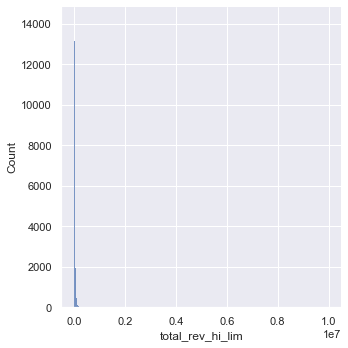

In [188]:
print("Number of Missing data for total revolving credit limit: ",data.total_rev_hi_lim.isna().sum())
sns.set(rc={'figure.figsize':(15,5)})
sns.displot(data.total_rev_hi_lim)
plt.show()

In [194]:
mask = data.total_rev_hi_lim.isnull() # we need to mask our inner filter
data.loc[mask, 'total_rev_hi_lim'] = data.loc[mask, 'total_rev_hi_lim'].fillna(data.total_rev_hi_lim.median())

In [195]:
data.isna().sum()

member_id                          0
loan_amnt                          0
funded_amnt                        0
funded_amnt_inv                    0
term                               0
batch_enrolled                130748
int_rate                           0
grade                              0
sub_grade                          0
emp_title                      51462
emp_length                     44825
home_ownership                     0
annual_inc                         0
verification_status                0
pymnt_plan                         0
purpose                            0
title                              0
zip_code                           0
addr_state                         0
dti                                0
delinq_2yrs                        0
inq_last_6mths                     0
mths_since_last_delinq        454312
open_acc                           0
pub_rec                            0
revol_bal                          0
revol_util                         0
t

In [196]:
data.dtypes

member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                           object
batch_enrolled                 object
int_rate                      float64
grade                          object
sub_grade                      object
emp_title                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
pymnt_plan                     object
purpose                        object
title                          object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                   float64
inq_last_6mths                float64
mths_since_last_delinq        float64
open_acc                      float64
pub_rec                       float64
revol_bal                     float64
revol_util  

In [2]:
data = pd.read_pickle('save3.pkl')

In [4]:
data[list(data.columns[data.isnull().mean() > 0])].head()

,batch_enrolled,emp_title,emp_length,mths_since_last_delinq
0,,clerk,9,50.0
1,BAT1586599,Human Resources Specialist,,NaN
2,BAT1586599,Driver,2,NaN
3,BAT4808022,Us office of Personnel Management,10,46.0
4,BAT2833642,LAUSD-HOLLYWOOD HIGH SCHOOL,10,NaN


# Check for Categorical and Continuous

In [5]:
data.dtypes

member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                           object
batch_enrolled                 object
int_rate                      float64
grade                          object
sub_grade                      object
emp_title                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
pymnt_plan                     object
purpose                        object
title                          object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                   float64
inq_last_6mths                float64
mths_since_last_delinq        float64
open_acc                      float64
pub_rec                       float64
revol_bal                     float64
revol_util  

In [8]:
data.columns

Index(['member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term',
       'batch_enrolled', 'int_rate', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'pymnt_plan', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'collections_12_mths_ex_med',
       'application_type', 'last_week_pay', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim', 'Type'],
      dtype='object')

In [3]:
# extracting the number out of the string
data.last_week_pay = data.last_week_pay.str.extract('(^\d*)')

In [5]:
categorical = ['member_id','term','batch_enrolled','grade','sub_grade','emp_title','emp_length','home_ownership',
              'verification_status','pymnt_plan','purpose','zip_code','addr_state','initial_list_status',
              'application_type','Type']
text = ['title']
numerical = ['loan_amnt','funded_amnt','funded_amnt_inv','int_rate','annual_inc','dti','delinq_2yrs','inq_last_6mths',
             'mths_since_last_delinq','open_acc','pub_rec','revol_bal','revol_util','total_acc',
            'total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','collections_12_mths_ex_med',
            'last_week_pay','acc_now_delinq','tot_coll_amt','tot_cur_bal','total_rev_hi_lim']

In [58]:
data[list(data.columns[data.isnull().sum() > 0])].columns

Index(['batch_enrolled', 'emp_title', 'emp_length', 'mths_since_last_delinq'], dtype='object')

In [11]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
encoder = OrdinalEncoder()
imputer = IterativeImputer()
# create a list of categorical columns to iterate over
#cat_cols = ['embarked','class1','deck1','who','embark_town','sex','adult_male','alive','alone']

def encode(data):
    '''function to encode non-null data and replace it in the original data'''
    #retains only non-null values
    nonulls = np.array(data.dropna())
    #reshapes the data for encoding
    impute_reshape = nonulls.reshape(-1,1)
    #encode date
    impute_ordinal = encoder.fit_transform(impute_reshape)
    #Assign back encoded values to non-null values
    data.loc[data.notnull()] = np.squeeze(impute_ordinal)
    return data

In [6]:
imp_dat = pd.DataFrame()
for columns in tqdm(categorical):
    imp_dat[columns] = encode(data[columns])

100%|██████████████████████████████████████████████████████████████████████████████████| 16/16 [00:09<00:00,  1.76it/s]


In [7]:
imp_dat_fin = pd.concat([imp_dat,data[numerical]],axis=1)
imp_dat_fin.isna().sum()

member_id                          0
term                               0
batch_enrolled                130748
grade                              0
sub_grade                          0
emp_title                      51462
emp_length                     44825
home_ownership                     0
verification_status                0
pymnt_plan                         0
purpose                            0
zip_code                           0
addr_state                         0
initial_list_status                0
application_type                   0
Type                               0
loan_amnt                          0
funded_amnt                        0
funded_amnt_inv                    0
int_rate                           0
annual_inc                         0
dti                                0
delinq_2yrs                        0
inq_last_6mths                     0
mths_since_last_delinq        454312
open_acc                           0
pub_rec                            0
r

In [8]:
for i in numerical:
    imp_dat_fin[i] = pd.to_numeric(imp_dat_fin[i])

In [12]:
encode_data = pd.DataFrame(np.round(imputer.fit_transform(imp_dat_fin)),columns = imp_dat_fin.columns)

In [14]:
encode_data.isna().sum()

member_id                     0
term                          0
batch_enrolled                0
grade                         0
sub_grade                     0
emp_title                     0
emp_length                    0
home_ownership                0
verification_status           0
pymnt_plan                    0
purpose                       0
zip_code                      0
addr_state                    0
initial_list_status           0
application_type              0
Type                          0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
int_rate                      0
annual_inc                    0
dti                           0
delinq_2yrs                   0
inq_last_6mths                0
mths_since_last_delinq        0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
total_rec_int                 0
total_re

In [15]:
encode_data.to_pickle('no_miss.pkl')

In [16]:
len(encode_data.columns)

40

In [17]:
len(data.columns)

41

In [22]:
encode_data['title'] = list(data['title'])

In [23]:
encode_data.isna().sum()

member_id                     0
term                          0
batch_enrolled                0
grade                         0
sub_grade                     0
emp_title                     0
emp_length                    0
home_ownership                0
verification_status           0
pymnt_plan                    0
purpose                       0
zip_code                      0
addr_state                    0
initial_list_status           0
application_type              0
Type                          0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
int_rate                      0
annual_inc                    0
dti                           0
delinq_2yrs                   0
inq_last_6mths                0
mths_since_last_delinq        0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
total_rec_int                 0
total_re

# Data Analysis

In [4]:
from scipy import stats
from scipy.special import boxcox1p

In [24]:
categorical

['member_id',
 'term',
 'batch_enrolled',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'verification_status',
 'pymnt_plan',
 'purpose',
 'zip_code',
 'addr_state',
 'initial_list_status',
 'application_type',
 'Type']

In [25]:
numerical

['loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'int_rate',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'collections_12_mths_ex_med',
 'last_week_pay',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'total_rev_hi_lim']

In [26]:
text

['title']

In [3]:
encode_data = pd.read_pickle('save4.pkl')

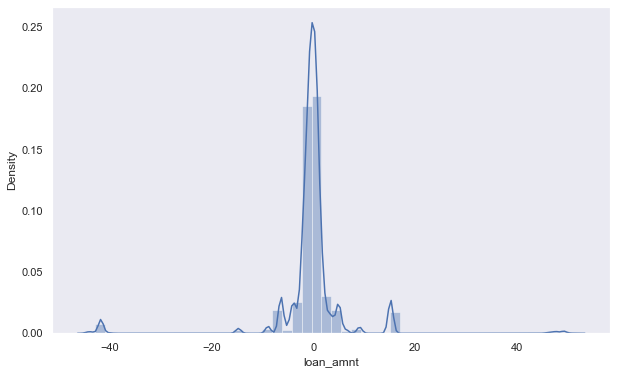

In [16]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(10,6)
sns.distplot(np.tan(encode_data['loan_amnt']),ax=ax)
plt.grid()
plt.show()

In [14]:
(np.tan(encode_data.loan_amnt)).mean()

-0.3460645548403106

In [15]:
(np.tan(encode_data.loan_amnt)).std()

7.559331250278037

In [28]:
fitted_lambda

0.4001246500373302

In [50]:
train_data = np.tan(encode_data.loan_amnt)

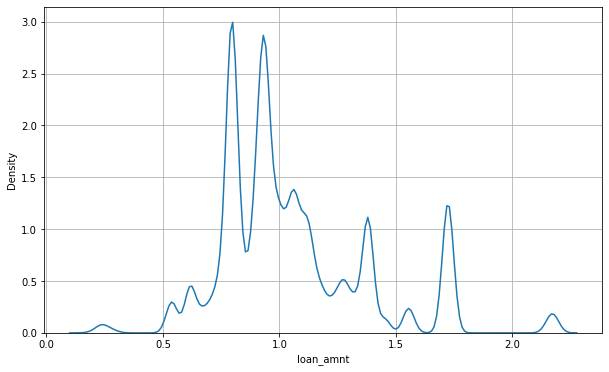

In [55]:
fig, ax = plt.subplots()
fig.set_size_inches(10,6)
sns.kdeplot(train_data**(1/5),ax=ax)
plt.grid()
plt.show()

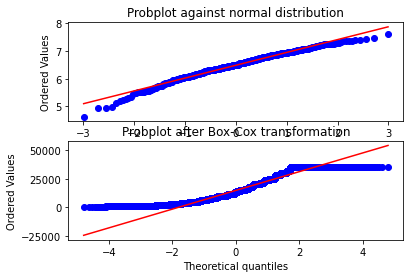

In [25]:
fig = plt.figure()
ax1 = fig.add_subplot(211)
x = stats.loggamma.rvs(5, size=500) + 5
prob = stats.probplot(x, dist=stats.norm, plot=ax1)
ax1.set_xlabel('')
ax1.set_title('Probplot against normal distribution')



ax2 = fig.add_subplot(212)
xt = boxcox1p(encode_data.loan_amnt,1.00)
prob = stats.probplot(xt, dist=stats.norm, plot=ax2)
ax2.set_title('Probplot after Box-Cox transformation')
plt.show()

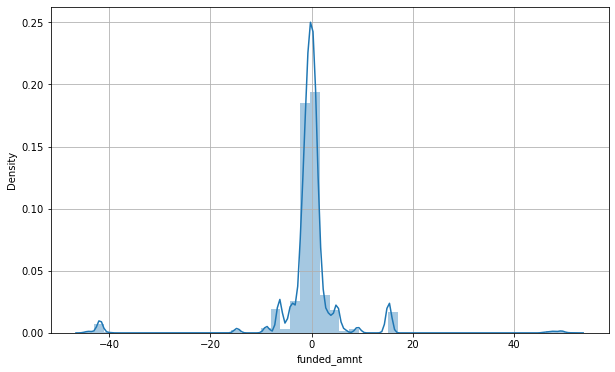

In [26]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(10,6)
sns.distplot(np.tan(encode_data.funded_amnt)[:TRAIN_ROWS],ax=ax)
plt.grid()
plt.show()

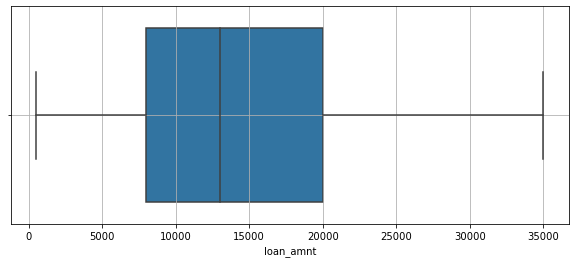

In [32]:
fig, ax = plt.subplots()
fig.set_size_inches(10,4)
sns.boxplot(encode_data.loan_amnt,ax=ax)
plt.grid()
plt.show()

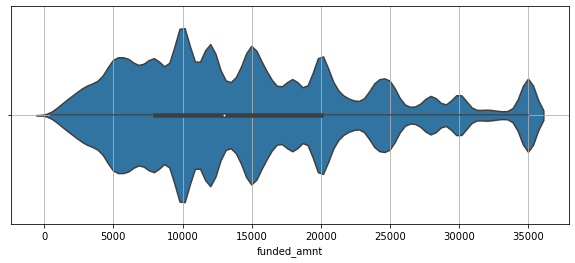

In [34]:
fig, ax = plt.subplots()
fig.set_size_inches(10,4)
sns.violinplot(encode_data.funded_amnt,ax=ax)
plt.grid()
plt.show()

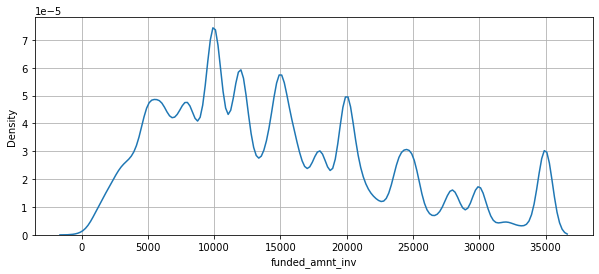

In [57]:
fig, ax = plt.subplots()
fig.set_size_inches(10,4)
sns.kdeplot((encode_data.funded_amnt_inv),ax=ax)
plt.grid()
plt.show()

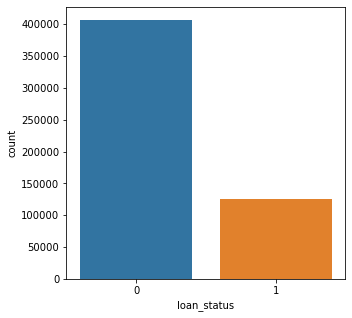

In [61]:
fig, ax = plt.subplots()
fig.set_size_inches(5,5)
sns.countplot(x=y_loan)
plt.show()

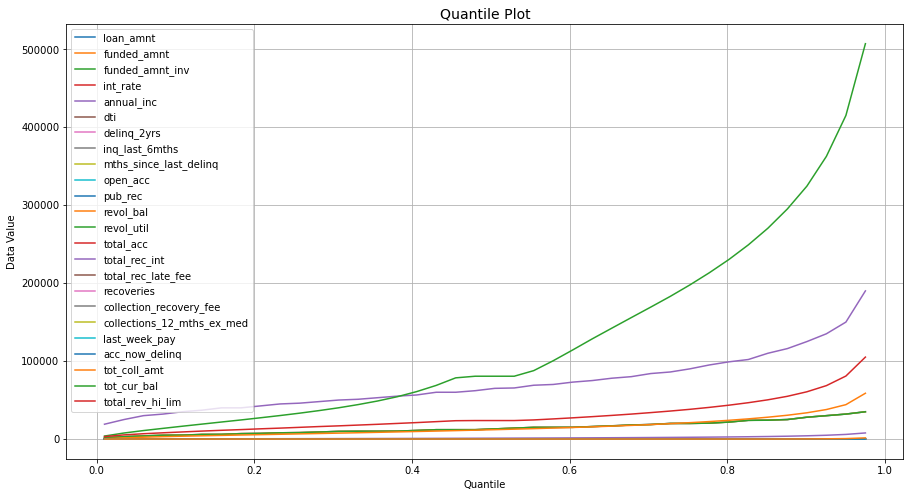

In [67]:
encode_data[numerical][:TRAIN_ROWS].quantile(np.linspace(.01, 1, 40, 0)).plot(figsize=(15,8))
plt.grid()
plt.xlabel("Quantile")
plt.ylabel("Data Value")
plt.title("Quantile Plot",size = 14)
plt.show()

In [70]:
encode_data[numerical][:TRAIN_ROWS].describe().T

,count,mean,std,min,25%,50%,75%,max
member_id,887379.0,443689.000000,256164.396598,0.0,221844.5,443689.0,665533.5,887378.0
term,887379.0,0.300045,0.458278,0.0,0.0,0.0,1.0,1.0
batch_enrolled,887379.0,58.391490,59.581370,0.0,0.0,43.0,94.0,206.0
grade,887379.0,1.798403,1.312599,0.0,1.0,2.0,3.0,6.0
sub_grade,887379.0,10.959942,6.493019,0.0,6.0,10.0,15.0,34.0
emp_title,887379.0,147779.405459,80262.552602,0.0,79652.5,152174.0,213845.0,1552671.0
emp_length,887379.0,3.751047,2.721159,0.0,2.0,3.0,6.0,78.0
home_ownership,887379.0,2.901430,1.921875,0.0,1.0,3.0,5.0,5.0
verification_status,887379.0,1.027408,0.792380,0.0,0.0,1.0,2.0,2.0
pymnt_plan,887379.0,0.000011,0.003357,0.0,0.0,0.0,0.0,1.0


### Getting rid of the Outliers

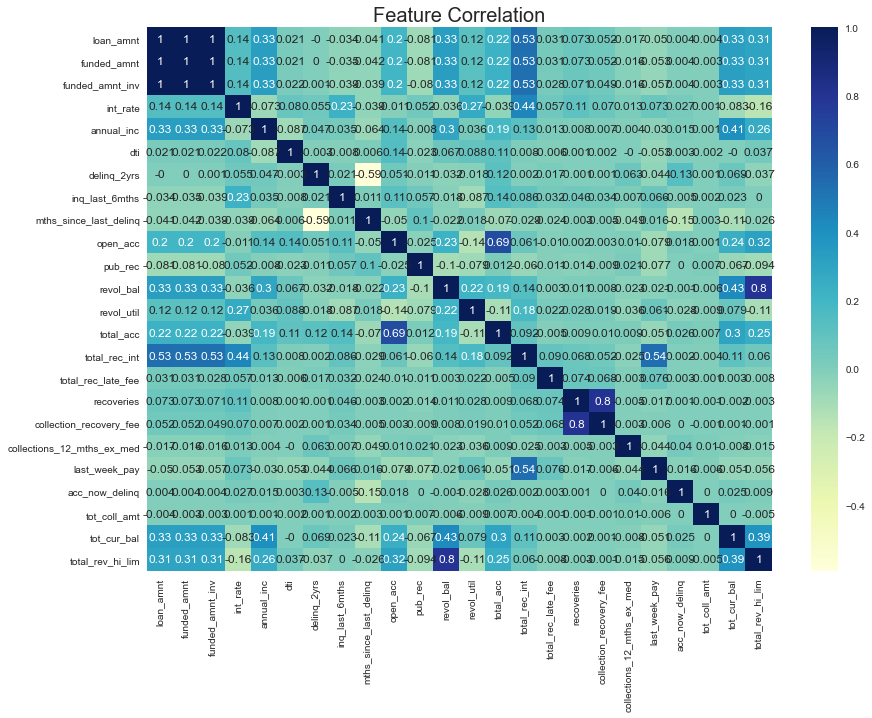

In [86]:
create_conrr(encode_data[numerical])

In [6]:
# These features needs to be deleated
high_correlation = ['funded_amnt','funded_amnt_inv','collection_recovery_fee','revol_bal']
encode_data.drop(high_correlation,axis = 1,inplace=True)

In [7]:
num_with_corr = [e for e in numerical if e not in (high_correlation)]

In [9]:
scaler = StandardScaler()
num_feat = scipy.sparse.csr_matrix(scaler.fit_transform(encode_data[num_with_corr]))
num_feat.shape

(887379, 20)

In [10]:
enc = OneHotEncoder(handle_unknown='ignore')
cat_spar = scipy.sparse.csr_matrix(enc.fit_transform(encode_data[categorical]))

In [11]:
cat_spar.shape

(887379, 1177870)

### Sampling

In [26]:
def sampling_data(X,y,option="SMOTE",strategy = "auto",n_jobs=1):
    if option.lower()=="smote":
        smo = SMOTE(random_state=52,sampling_strategy = strategy,n_jobs=n_jobs)
        smo.fit(X, y)
        X_resampled, y_resampled = smo.fit_sample(X, y)
        return X_resampled,y_resampled
    elif option.lower()=="undersample":
        rus = RandomUnderSampler(random_state=42,sampling_strategy = strategy)
        rus.fit(X, y)
        X_resampled, y_resampled = rus.fit_sample(X, y)
        return X_resampled,y_resampled
    elif option.lower()=="oversample":
        ros = RandomOverSampler(random_state=42,sampling_strategy = strategy)
        ros.fit(X, y)
        X_resampled, y_resampled = ros.fit_sample(X, y)
        return X_resampled,y_resampled
    elif option.lower()=="nearmiss":
        near = NearMiss(sampling_strategy = strategy,n_jobs=n_jobs)
        near.fit(X, y)
        X_resampled, y_resampled = near.fit_sample(X, y)
        return X_resampled,y_resampled
    else:
        print("Please select from the below options: ")
        print("1: Undersample || 2: Oversample || 3: Nearmiss || 4. SMOTE")

In [27]:
def create_conrr(mat):
    sns.set_style("dark")
    plt.figure(figsize=(14, 10))
    ax = sns.heatmap(mat.corr().round(3), annot=True,cmap="YlGnBu")
    plt.grid()
    plt.title("Feature Correlation", size = 20)
    plt.show()

In [28]:
def text_to_numbers(data,model='BOW',gram=1,feat_names=False):
    if model.lower()=='bow':
        vectorizer = CountVectorizer(ngram_range=(1, gram))
        x = vectorizer.fit_transform(data)
        if feat_names==True:
            count_list = x.toarray().sum(axis=0)
            word_freq = dict(zip(vectorizer.get_feature_names(),count_list))
            print("End of Word String to Vector\n")
            return word_freq            
        else:
            print("End of Word String to Vector\n")
            return x
    if model.lower()=='tfidf':
        vectorizer = TfidfVectorizer()
        x = vectorizer.fit_transform(data)
        if feat_names== True:
            count_list = x.toarray().sum(axis=0)
            word_freq = dict(zip(vectorizer.get_feature_names(),count_list))
            print("End of Word String to Vector\n")
            return word_freq
        else:
            print("End of Word String to Vector\n")
            return x
    else:
        print("Please enter: \n'model':\n 'BOW': Bag of Words\n 'TFIDF':TF-IDF\n'gram' for N_Gram: mention a nunber(Between 1-4) if 'BOW'is closen\n")
        print("If you want the feature names, please make 'feat_names' as true\nThis would only return the geature names")
        print("End of Word String to Vector\n")

In [29]:
def stemming_word(data,splitting = True,type_of = "snow"):
    if type_of.lower() == "snow":
        stemmer = SnowballStemmer('english')
        a = []
        if splitting == True:
            a = data.apply(lambda x: [stemmer.stem(y) for y in x.split()])
            a = a.str.join(" ")
        else:
            a = data.apply(lambda k: [stemmer.stem(y) for y in k])
            a = a.str.join("")
        print("End of Word Stemming\n")
        return a
    if type_of.lower() == "porter":
        stemmer = PorterStemmer()
        a = []
        if splitting == True:
            a = data.apply(lambda x: [stemmer.stem(y) for y in x.split()])
            a = a.str.join(" ")
        else:
            a = data.apply(lambda k: [stemmer.stem(y) for y in k])
            a = a.str.join("")
        print("End of Word Stemming\n")
        return a
    if type_of.lower()=="lemm":
        lem = WordNetLemmatizer()
        a = []
        if splitting == True:
            a = data.apply(lambda x: [lem.lemmatize(y) for y in x.split()])
            a = a.str.join(" ")
        else:
            a = data.apply(lambda k: [lem.lemmatize(y) for y in k])
            a = a.str.join("")
        print("End of Word Stemming\n")
        return a
    else:
        print("Plese Select the mentioned Options for 'type_of' field:\n")
        print("1>'Snow': SnowballStemmer\n2>'Porter':PorterStemmer\n3>'Lemm':WordNetLemmatizer")
        print("End of Word Stemming\n")

In [30]:
def validate_result(y_true, y_pred,model="Model"):
    print(f"The Result for the {model} Classification is a Below\n")
    fig, ax = plt.subplots(figsize=(15,5))
    conf = confusion_matrix(y_true, y_pred).round(3)
    b = sns.heatmap(conf.round(3), cmap="YlGnBu",annot=True,ax = ax)
    b.axes.set_title("Confusion Matrix",fontsize=20)
    b.set_xlabel("Predicted Value",fontsize=16)
    b.set_ylabel("True Value",fontsize=16)
    b.tick_params(labelsize=16)
    print("=="*50)
    print(f"Recall Score: {(recall_score(y_true, y_pred)*100).round(3)} %")
    print(f"Precision Score: {(precision_score(y_true, y_pred)*100).round(3)} %")
    print("F1 Score: ",f1_score(y_true, y_pred).round(3))
    print("Log Loss: ",log_loss(y_true, y_pred).round(3))
    report = classification_report(y_true, y_pred, output_dict=True)
    df = pd.DataFrame(report).transpose()
    print("Classification Report:\n",df.round(3))
    print("ROC_AUC SCORE: ",roc_auc_score(y_true, y_pred))

In [31]:
def pandas_to_sparse(data,rev,summ):
    mat2 = scipy.sparse.csr_matrix(data)
    mat1 = hstack([rev,summ])
    print("End of Sparse Matrix\n")
    return hstack([mat1,mat2])

In [18]:
text = stemming_word(encode_data['title'],splitting = True,type_of = "snow")

End of Word Stemming



In [19]:
text = text_to_numbers(text,model='BOW',gram=2,feat_names=False)

End of Word String to Vector



In [20]:
text = scipy.sparse.csr_matrix(text)

In [26]:
type(num_feat)

scipy.sparse.csr.csr_matrix

In [25]:
type(cat_spar)

scipy.sparse.csr.csr_matrix

In [32]:
data = scipy.sparse.hstack([scipy.sparse.hstack([num_feat,cat_spar]),text])

In [33]:
scipy.sparse.save_npz('sparse_matrix1.npz', data)

1: Numerical Vectors standardization -  of all data - Done <br>
2: Categorical Vectors OneHotEncoding - of all data - Done <br>
3: Text data stemming and conversion to vectors - Of All Data - Done <br>
<br>
4: Concat all but in a Sparse Matrix format <br>
<br>
5: Split train and test <br>
<br>
6: Get rid of the outliers <br>
<br>
7: Start Training <br>

In [35]:
data = data.tocsr()
train = data[:TRAIN_ROWS]
test = data[TRAIN_ROWS:]

In [40]:
scipy.sparse.save_npz('train1.npz', train)
scipy.sparse.save_npz('test1.npz', test)

In [8]:
def percentile(N, P):
    N = N.todense()
    n = int(round(P * len(N) + 0.5))
    if n > 1:
        return N[n-2]
    else:
        return 0

In [3]:
y = pd.read_pickle('y.pkl')
train = scipy.sparse.load_npz('train1.npz')
test = scipy.sparse.load_npz('test1.npz')

In [4]:
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.33, random_state=42)

# Logistic

In [10]:
param = {'alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3],'penalty': ['l2','l1']}

log_rand = RandomizedSearchCV(SGDClassifier(loss='log',early_stopping=True),param,
                              verbose=50,return_train_score=True,scoring='roc_auc',cv=5,n_jobs=4)
log_rand.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    5.5s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    5.6s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    5.6s
[Parallel(n_jobs=4)]: Done   4 tasks      | elapsed:    5.8s
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    8.2s
[Parallel(n_jobs=4)]: Done   6 tasks      | elapsed:    8.3s
[Parallel(n_jobs=4)]: Done   7 tasks      | elapsed:    8.7s
[Parallel(n_jobs=4)]: Done   8 tasks      | elapsed:    8.9s
[Parallel(n_jobs=4)]: Done   9 tasks      | elapsed:   11.0s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   11.1s
[Parallel(n_jobs=4)]: Done  11 tasks      | elapsed:   12.2s
[Parallel(n_jobs=4)]: Done  12 tasks      | elapsed:   12.4s
[Parallel(n_jobs=4)]: Done  13 tasks      | elapsed:   14.5s
[Parallel(n_jobs=4)]: Done  14 tasks      | elapsed:   14.6s
[Parallel(

RandomizedSearchCV(cv=5,
                   estimator=SGDClassifier(early_stopping=True, loss='log'),
                   n_jobs=4,
                   param_distributions={'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0,
                                                  10.0, 100.0, 1000.0],
                                        'penalty': ['l2', 'l1']},
                   return_train_score=True, scoring='roc_auc', verbose=50)

In [11]:
log_rand.best_estimator_

SGDClassifier(early_stopping=True, loss='log', penalty='l1')

In [12]:
clf = SGDClassifier(early_stopping=True, loss='log', penalty='l1')
clf.fit(X_train,y_train)

SGDClassifier(early_stopping=True, loss='log', penalty='l1')

The Result for the [[9.99999998e-01 2.01346186e-09]
 [9.14682256e-01 8.53177440e-02]
 [8.88081336e-01 1.11918664e-01]
 ...
 [9.59506272e-01 4.04937280e-02]
 [2.51168488e-02 9.74883151e-01]
 [2.76120834e-01 7.23879166e-01]] Classification is a Below

Recall Score: 48.607 %
Precision Score: 77.463 %
F1 Score:  0.597
Log Loss:  5.34
Classification Report:
               precision  recall  f1-score     support
0                 0.858   0.956     0.904  134249.000
1                 0.775   0.486     0.597   41453.000
accuracy          0.845   0.845     0.845       0.845
macro avg         0.816   0.721     0.751  175702.000
weighted avg      0.838   0.845     0.832  175702.000
ROC_AUC SCORE:  0.7212017149259281


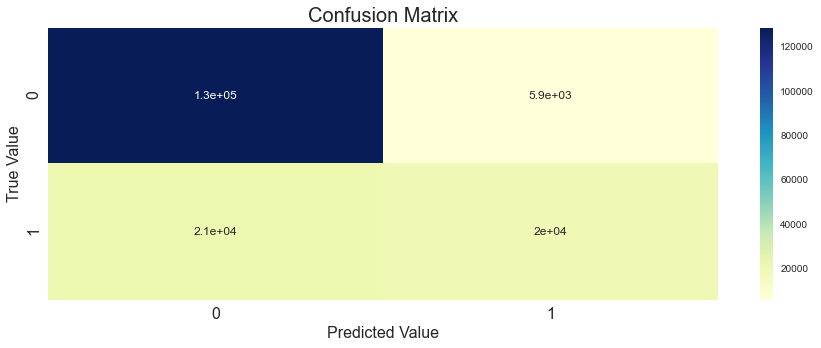

In [13]:
validate_result(y_test,clf.predict(X_test),clf.predict_proba(X_test))

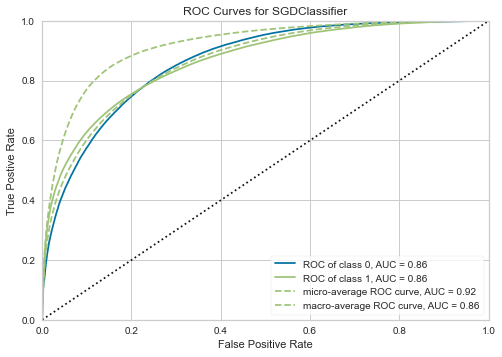

ROCAUC(ax=<AxesSubplot:title={'center':'ROC Curves for SGDClassifier'}, xlabel='False Positive Rate', ylabel='True Postive Rate'>,
       classes=[0, 1], model=None)

In [14]:
roc_auc(clf,X_train,y_train,X_test = X_test, y_cv = y_test,classes=[0,1])

# SVM

In [15]:
param = {'alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3],'penalty': ['l2','l1']}

svm_rand = RandomizedSearchCV(SGDClassifier(loss='hinge',early_stopping=True),param,
                              verbose=50,return_train_score=True,scoring='roc_auc',cv=5,n_jobs=4)
svm_rand.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    3.8s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    3.8s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    3.8s
[Parallel(n_jobs=4)]: Done   4 tasks      | elapsed:    3.9s
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    6.7s
[Parallel(n_jobs=4)]: Done   6 tasks      | elapsed:    6.8s
[Parallel(n_jobs=4)]: Done   7 tasks      | elapsed:    6.8s
[Parallel(n_jobs=4)]: Done   8 tasks      | elapsed:    7.9s
[Parallel(n_jobs=4)]: Done   9 tasks      | elapsed:    9.3s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    9.4s
[Parallel(n_jobs=4)]: Done  11 tasks      | elapsed:   10.5s
[Parallel(n_jobs=4)]: Done  12 tasks      | elapsed:   11.5s
[Parallel(n_jobs=4)]: Done  13 tasks      | elapsed:   12.7s
[Parallel(n_jobs=4)]: Done  14 tasks      | elapsed:   12.9s
[Parallel(

RandomizedSearchCV(cv=5, estimator=SGDClassifier(early_stopping=True), n_jobs=4,
                   param_distributions={'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0,
                                                  10.0, 100.0, 1000.0],
                                        'penalty': ['l2', 'l1']},
                   return_train_score=True, scoring='roc_auc', verbose=50)

In [16]:
svm_rand.best_estimator_

SGDClassifier(early_stopping=True, penalty='l1')

In [18]:
clf = SGDClassifier(early_stopping=True, penalty='l1')
clf.fit(X_train,y_train)

SGDClassifier(early_stopping=True, penalty='l1')

The Result for the Model Classification is a Below

Recall Score: 46.824 %
Precision Score: 76.121 %
F1 Score:  0.58
Log Loss:  5.53
Classification Report:
               precision  recall  f1-score    support
0                 0.853   0.955     0.901  134249.00
1                 0.761   0.468     0.580   41453.00
accuracy          0.840   0.840     0.840       0.84
macro avg         0.807   0.711     0.740  175702.00
weighted avg      0.832   0.840     0.825  175702.00
ROC_AUC SCORE:  0.711442561509679


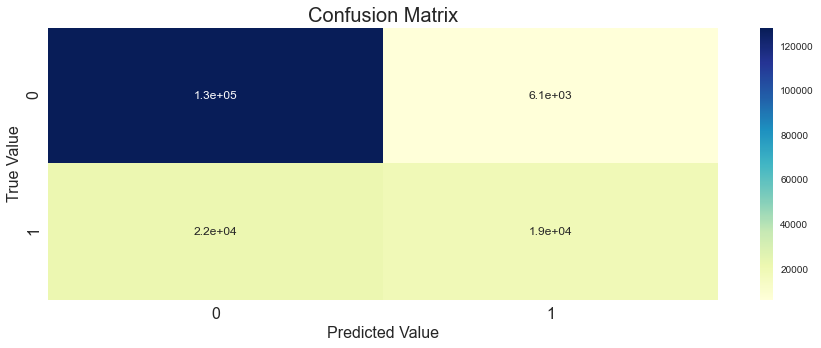

In [19]:
validate_result(y_test,clf.predict(X_test))

In [10]:
# RandomForest
params = {"max_depth": [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
          "min_samples_leaf": [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]}
rf_rand = RandomizedSearchCV(RandomForestClassifier(),params,
                              verbose=8,return_train_score=True,scoring='roc_auc',cv=3,n_jobs=5)
rf_rand.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:  2.8min
[Parallel(n_jobs=5)]: Done  25 out of  30 | elapsed:  7.5min remaining:  1.5min
[Parallel(n_jobs=5)]: Done  30 out of  30 | elapsed:  9.1min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=5,
                   param_distributions={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14],
                                        'min_samples_leaf': [3, 4, 5, 6, 7, 8,
                                                             9, 10, 11, 12, 13,
                                                             14]},
                   return_train_score=True, scoring='roc_auc', verbose=8)

In [11]:
rf_rand.best_estimator_

RandomForestClassifier(max_depth=8, min_samples_leaf=7)

In [12]:
clf = RandomForestClassifier(max_depth=8, min_samples_leaf=7)
clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=8, min_samples_leaf=7)

The Result for the Model Classification is a Below

Recall Score: 0.0 %
Precision Score: 0.0 %
F1 Score:  0.0
Log Loss:  8.149
Classification Report:
               precision  recall  f1-score     support
0                 0.764   1.000     0.866  134249.000
1                 0.000   0.000     0.000   41453.000
accuracy          0.764   0.764     0.764       0.764
macro avg         0.382   0.500     0.433  175702.000
weighted avg      0.584   0.764     0.662  175702.000
ROC_AUC SCORE:  0.5


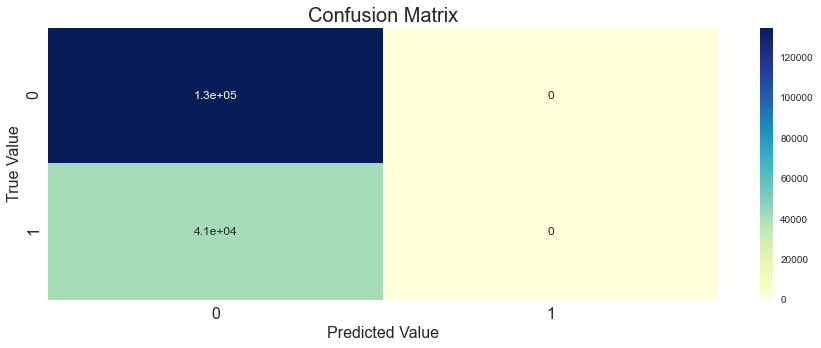

In [13]:
validate_result(y_test,clf.predict(X_test))

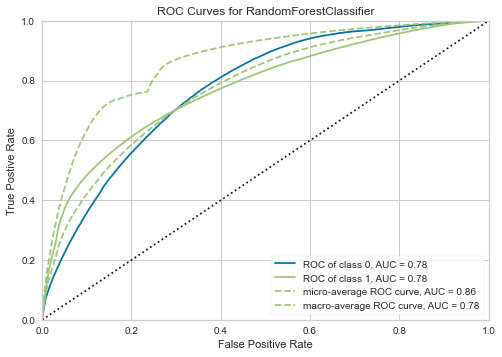

ROCAUC(ax=<AxesSubplot:title={'center':'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Postive Rate'>,
       classes=[0, 1], model=None)

In [14]:
roc_auc(clf,X_train,y_train,X_test = X_test, y_cv = y_test,classes=[0,1])

In [19]:
X_train,y_train = sampling_data(X_train,y_train,option="SMOTE",strategy = "auto",n_jobs=4)

In [21]:
scipy.sparse.save_npz('X_train_smp.npz', X_train)
scipy.sparse.save_npz('y_train_smp.npz', scipy.sparse.csr_matrix(y_train))

In [5]:
X_train = scipy.sparse.load_npz("X_train_smp.npz")
y_train = scipy.sparse.load_npz('y_train_smp.npz')

<AxesSubplot:xlabel='loan_status', ylabel='count'>

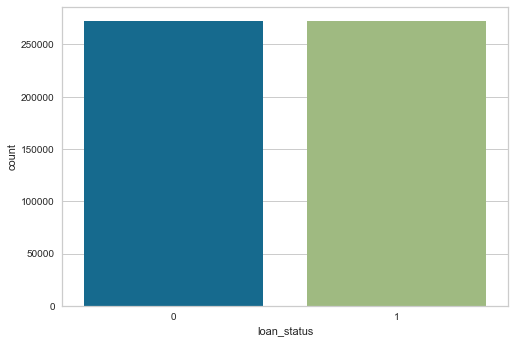

In [22]:
sns.countplot(y_train)

# XGB

In [18]:
params = {"learning_rate" : [0.00001,0.0001,0.001,0.01,0.1,1,10,100] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ],
         'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100],
         'subsample':[0.6, 0.7, 0.8, 0.9]}
xgb_rand = RandomizedSearchCV(XGBClassifier(),params,
                              verbose=100,return_train_score=True,scoring='roc_auc',cv=3,n_jobs=5)
xgb_rand.fit(X_train,y_train.todense().reshape(544704,1))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   1 tasks      | elapsed:  7.8min
[Parallel(n_jobs=5)]: Done   2 tasks      | elapsed:  8.6min
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:  8.6min
[Parallel(n_jobs=5)]: Done   4 tasks      | elapsed: 10.6min
[Parallel(n_jobs=5)]: Done   5 tasks      | elapsed: 10.7min
[Parallel(n_jobs=5)]: Done   6 tasks      | elapsed: 12.3min
[Parallel(n_jobs=5)]: Done   7 tasks      | elapsed: 12.6min
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed: 13.3min
[Parallel(n_jobs=5)]: Done   9 tasks      | elapsed: 14.6min
[Parallel(n_jobs=5)]: Done  10 tasks      | elapsed: 14.9min
[Parallel(n_jobs=5)]: Done  11 tasks      | elapsed: 15.1min
[Parallel(n_jobs=5)]: Done  12 tasks      | elapsed: 15.7min
[Parallel(n_jobs=5)]: Done  13 tasks      | elapsed: 17.0min
[Parallel(n_jobs=5)]: Done  14 tasks      | elapsed: 17.3min
[Parallel(

RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           verbosity=None),
                   n_jobs=5,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                

In [19]:
xgb_rand.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.4, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=1, max_delta_step=0, max_depth=5,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=100, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [20]:
xgb_rand.best_score_

0.9288747045615474

In [24]:
clf = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.4, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=1, max_delta_step=0, max_depth=5,
              min_child_weight=5, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=100, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=1)
clf.fit(X_train,y_train.todense().reshape(544704,1))

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.4, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=1, max_delta_step=0, max_depth=5,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=100, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=1)

The Result for the [[0.93241096 0.06758907]
 [0.8268312  0.1731688 ]
 [0.9332731  0.06672695]
 ...
 [0.9933648  0.00663517]
 [0.00240308 0.9975969 ]
 [0.02432579 0.9756742 ]] Classification is a Below

Recall Score: 71.954 %
Precision Score: 88.199 %
F1 Score:  0.793
Log Loss:  3.07
Classification Report:
               precision  recall  f1-score     support
0                 0.918   0.970     0.943  134249.000
1                 0.882   0.720     0.793   41453.000
accuracy          0.911   0.911     0.911       0.911
macro avg         0.900   0.845     0.868  175702.000
weighted avg      0.910   0.911     0.908  175702.000
ROC_AUC SCORE:  0.8449047245826179


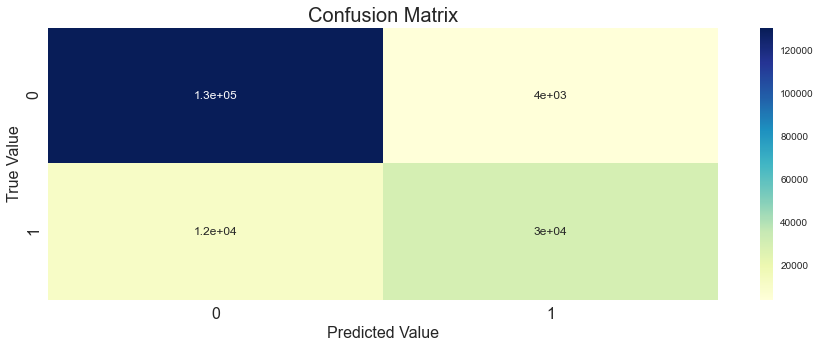

In [32]:
validate_result(y_test,clf.predict(X_test),clf.predict_proba(X_test))

In [36]:
test = scipy.sparse.load_npz('test1.npz')

In [37]:
y_pred = clf.predict(test)

In [38]:
subb = pd.read_csv('test_indessa.csv')

In [39]:
subb.columns

Index(['member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term',
       'batch_enrolled', 'int_rate', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'pymnt_plan', 'desc', 'purpose', 'title', 'zip_code', 'addr_state',
       'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'application_type', 'verification_status_joint', 'last_week_pay',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim'],
      dtype='object')

In [40]:
sub1 = pd.DataFrame()

In [41]:
sub1['member_id'] = subb['member_id']
sub1['loan_status'] = y_pred

In [42]:
sub1.shape

(354951, 2)

In [44]:
sub1.isna().sum()

member_id      0
loan_status    0
dtype: int64

In [45]:
sub1.to_csv("sub.csv",index=False)